<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">[<img src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="70%">](http://www.datascience-paris-saclay.fr)</td>
  </tr>
</table> 
</div>

_Aboubakr Lô, Antoine Prat, Guillaume Lachaud, Hadrien Piegard, Ilham Harmach, Matias Kondracki_


# Predicting future outcomes through a Buzz on Social media

## Introduction: 

“The Internet is enabling conversations among human beings that were simply not possible in the era of mass media.” <br>
						                                                                            *The Cluetrain Manifesto (Levine et al. 2000, p. XXII) *

Recent world events, such as Iran’s last presidential election and the Arab Spring movement, have compellingly demonstrated the power of microblogging for the rapid spread of information among networked individuals.
<br>Indeed, social media has exploded as a category of online discourse where people create content, share it, bookmark it and network at an impressive rate. Examples include Facebook, Twitter, Instagram, and many other platforms.
<br>It reaches a potentially very large number of consumers with a single message  and enables real-time information sharing among people from any place. This unique combination of characteristics implies that these platforms can reach a vast number of individuals at unprecedented speed. 
<br>As data scientists, we see the enormity and high variance of the information as an interesting opportunity for harnessing that data into a form that allows for speciﬁc predictions about particular outcomes. 
<br>A buzz is the "sound" on the Web of an event that massively sparks feedback from users. However, The prediction of bursty events on the internet is a challenging task. Difficulties are due to the diversity of information sources, the size of the internet, dynamics of popularity, user behaviors.  We can address this problem by using machine learning and investigating a wide spectrum of features based on the content of the messages, temporal information, metadata of messages and users, as well as structural properties of the users’ social graph on a large scale dataset.
By observing the importance already attached by journalists and politicians to these phenomena, it is certain that even larger parts of the socio-economic domains will be affected in the future.
In response to such need, the goal of this challenge is to develop prediction models able to identify buzz events by considering two different social networks: Twitter, a micro-blogging platform with exponential growth and extremely fast dynamics, and Tom’s Hardware, a worldwide forum network focusing on new technology with more conservative dynamics but distinctive features. Tom’s Hardware (TH) and Twitter (TW) have very distinctive properties:
* In (TW) there is no direct audience estimator, and we use the nad feature as the target feature, while it is given in (TH) by the number of displays, that measures the number of times a content is displayed to visitors
* (TW) shows a higher reactivity of exchanges than (TH) 80% of re-tweets take place in the day following the initial tweet, whereas in th the replies to a thread are mostly produced during the subsequent week;
* The (TW) community is broader than the (TH) one, with more than 500 million visitors per month against nearly 41 millions in (TH)
* In this analysis, we focus on 6671 topics, such as: over-cloaking; grafikkarten; disque dur; android; etc. related to the technology domain.

In this analysis, we focus on 6671 topics, such as: over-cloaking; grafikkarten; disque dur; android; etc. related to the technology domain.


# Business goal

Our goal in this challenge is to predict buzzes in social media,  for two platforms : Twitter and Tom's Hardware.This can be done by predicting the mean number of active discussion (NAD), which is : 
is a positive integer that describes the popularity of an instance's topic.

#Business interest 

Predicting a future buzz can be crucial for social media marketing. 
Indeed, many businesses are creating social media website accounts and using them in an efficient manner so that they are getting more exposure for their business. Greater engagement typically translates into a more positive experience for the consumer which has long-term positive effects for companies.
A few examples of why business would be interested in predicting a buzz: 
- As microblogging platforms have opened up a two-way communication between businesses and their customers, it’s easier for customers to complain about company; but it’s much quicker and easier for companies to potentially resolve an issue, and avoid a viral complaint by predicting the buzz. 
- As social media platforms create a market research opportunity for businesses to see what customers are talking about, their sentiment and what is important to them about products and services, predicting a buzz can give them an insight into future trends, giving them ideas about products worth investing into. 
- For movie companies, predicting a buzz can be crucial, especially in the latter stages of the film development process.  Indeed, a buzz will reflect to which extent potentiel movie goers are interested, and hence predict the success of the movie. 
Hence, prediction of buzzes can make us gain useful insights and predict future trends and consumer behavior, which can be extremely helpful when designing marketing and advertising campaign.

In a political context, predicting a buzz can be helpful in many ways. Indeed, social media reflects the underlying trend in a political race that goes beyond a district’s fundamental geographic composition.
Polling is a very expensive way  to monitor elections. However, predicting political buzzes can  reveal how elections will be conducted and for which candidates people are most in favor. 

<br>Hence, prediction of buzzes can make us gain useful insights and predict future trends and consumer behavior, which can be extremely helpful when designing marketing and advertising campaigns. By observing the importance already attached by journalists and politicians to these phenomena, it is certain that even larger parts of the socio-economic domains will be affected in the future.

# Data synopsis


This dataset contains two different social networks: Twitter and Tom’s Hardware. <br>
**Creators** : 
François Kawala, Ahlame Douzal, Eric Gaussier and Eustache Diemert.<br>
The data is from BestofMedia (ediemert@bestofmedia.com) and is from May, 2013. <br>



# Requirements
- numpy>=1.10.0
- matplotlib>=1.5.0
- pandas>=0.19.0
- scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)
- seaborn>=0.7.1
- lightgbm
- google-drive-downloader (pip install googledrivedownloader)

# 0. Download the datas

### Getting the data

The public train and test data can be downloaded by running from the root of the starting kit:

    python download_data.py


In [50]:
!python download_data.py

Raw files downloaded
Intermediary file 1/2 created
Intermediary file 2/2 created
Preprocessing done
data_train file created
labels_train file created
data_test file created
labels_test file created
DONE! Good Luck!


## 0.1 Import

In [51]:
# %matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Table of contents

### 1. Exploratory Analysis<br>
 - 1.1 [Data Presentation](#datapres)<br>
 - 1.2 [Data Preprocessing](#dataprocess)<br>
 - 1.3 [Data Visualization](#datavisu)
  
### 2. Pipeline<br>
  - 2.1 [Feature Engineering](#FeatureEng) <br>
  - 2.2 [Regressor](#regressor)<br>
  
### 3. Score Measure<br>
  - 3.1 [Score metrics](#Score)
  - 3.2 [Ramp_test_submission](#ramp)

#  1. Exploratory Analysis

## 1.1 Data presentation <a name="datapres"></a>

For both Twitter and Tom's Hardware: <br>

Each instance covers height weeks of observation for a specific topic (eg. 
overclocking...). The predicted attribute's mean value is computed on  
the couple weeks following this initial observation.<br>
Observations are Independent and identically distributed.<br>
Furthermore,  each instance is described by 77 features, which describe the evolution of 11 "primary features" through time.<br> Hence each feature name is postfixed with the relative time of observation. <br>For instance, the value of the feature *"Nb_Active_Discussion"* at time t is given in *'Nb_Active_Discussion_t'*.
 
**Features** : <br>

**1/ Number of Created Discussions (NCD)** : *This feature measures the number of discussions created at time step t and involving the instance's topic.<br>*

**2/ Average Discussions Length (NAD)** : *This features measures the number of discussions involving the instance's topic until time t.<br>*

**3/ Author increase (AI)** : *This feature measures the number of new authors interacting on the instance's topic at time t (i.e. its popularity)<br>*

**4/ Number of Atomic Containers (NAC)** : *This feature measures the total number of atomic containers generated through the whole social media on the instance's topic until time t.<br>*

**5/ Number of displays (ND)** : *This feature gives the number of time discussions
relying on the instance's topic has been displayed by users.<br>*

**6/ Contribution Sparseness (CS)** : *This feature is a measure of spreading of contributions over discussion for the instance's topic at time t.<br>*
 
**7/ Author Interaction (AT)** : *This feature measures the average number of authors interacting on the instance's topic within a discussion.*<br>

**8/ Number of Authors (NA)** : *This feature measures the number of authors interacting on the instance's topic at time t.*<br>

**9/ Average Discussions Length (ADL)** : *This feature directly measures the average length of a discussion belonging to the instance's topic.*<br>

**10/ Attention Level (measured with number of authors) AS(NA)** : *This feature is a measure of the attention payed to a the instance's topic on a social media.*<br>

**11/ Attention Level (measured with number of contributions) AS(NAC)** : *This feature is a measure of the attention payed to a the instance's topic on a social media.*<br>

## 1.2 Data Preprocessing <a name="dataproces"></a>

See Notebook Preprocessing in the same folder to see how we created the database from the .data files we downloaded

## 1.3 Data Visualization <a name="datavisu"></a>

### Data-analysis suggestions
The data may be scaled and normalized.
It could also be useful to find correlations between the features of the data. For instance, the burstiness level, which is the ratio of f NCD and NAD for a topic Z at time t, can be a helpful tool for predictions. <br>
First order discrete difference over features may also  be considered as additional features.

In [52]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [53]:
from problem import get_train_data

X_train, labels_train = get_train_data()

In [54]:
X_train.head()

,site,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,AI_0,AI_1,...,NA_4,NA_5,NA_6,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6
0,Twitter,1.068376,1.063725,1.185315,1.085034,1.082325,1.069091,1.057644,135.0,148.0,...,402.0,248.0,356.0,232.0,204.0,285.0,292.0,412.0,274.0,398.0
1,Twitter,1.428571,1.000000,1.000000,1.000000,1.600000,1.000000,1.000000,0.0,5.0,...,8.0,12.0,2.0,7.0,5.0,6.0,6.0,10.0,12.0,2.0
2,Twitter,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,169.0,176.0,...,601.0,545.0,465.0,494.0,482.0,755.0,697.0,708.0,711.0,550.0
3,Twitter,1.117647,1.681818,1.209302,1.057143,1.148148,1.083333,1.047619,11.0,21.0,...,29.0,37.0,20.0,17.0,21.0,42.0,34.0,26.0,36.0,21.0
4,Twitter,2.000000,1.000000,1.500000,3.500000,2.500000,1.000000,1.000000,6.0,3.0,...,14.0,4.0,7.0,4.0,3.0,4.0,7.0,6.0,5.0,8.0


In [55]:
print("Nombre de thèmes sur Twitter :")
print(len(X_train[X_train['site'] == 'Twitter']))
print("Nombre de thème sur la site TomsHardware :")
print(len(X_train[X_train['site'] == 'Tomshardware']))
print("Proportion en % : ", len(X_train[X_train['site'] == 'Tomshardware']) / (len(X_train[X_train['site'] == 'Tomshardware']) + len(X_train[X_train['site'] == 'Twitter'])))

Nombre de thèmes sur Twitter :
495720
Nombre de thème sur la site TomsHardware :
23994
Proportion en % :  0.04616769992726769


###  Some plots <br>
We will see below the Correlogram plot of the two initial raw datasets and the density distribution of some variables with low correlation. We can note that a lot of these variables are well correlated whoch meet their definition. This is a sign of a good dataset we can work with to predict an upcoming "buzz".

In [56]:
# Import Dataset
X_train['Value'] = labels_train
df_thr = X_train[X_train['site'] == 'Tomshardware'].copy()
df_twr = X_train[X_train['site'] == 'Twitter'].copy()

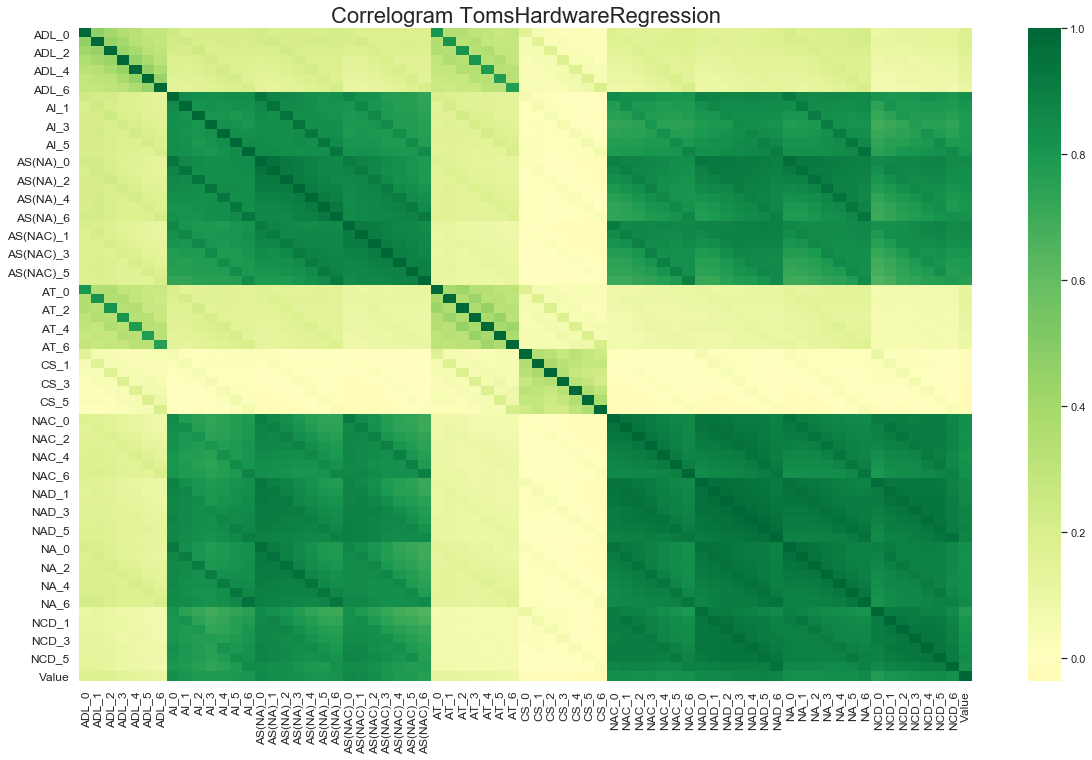

In [57]:
# Plot the correlogram
plt.figure(figsize=(20,12))
sns.heatmap(df_thr.corr(), cmap='RdYlGn', center=0, annot=False)
plt.title('Correlogram TomsHardwareRegression', fontsize=22)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can see in the correlogram above that the number of discussion created by the topic, involving the topic, the number of authors interacting with the topic and the number of time discussion have mutually high correlations. Which is by construction a result one would expect. These variables are also well corelated with every other variables but the measure of spreading of contributions over discussion for the instance's topic, measures the average number of authors interacting on the instance's topic within a discussion and the measures the average length of a discussion belonging to the instance's topic. It will be then very interesting to see the distributions and the repartition of these variables with low correlation values. <br>
The scatter matrix below show the repartition of these not correlated variables and some well correlated variables. The points distributions show the exact same result as the correlogram above.

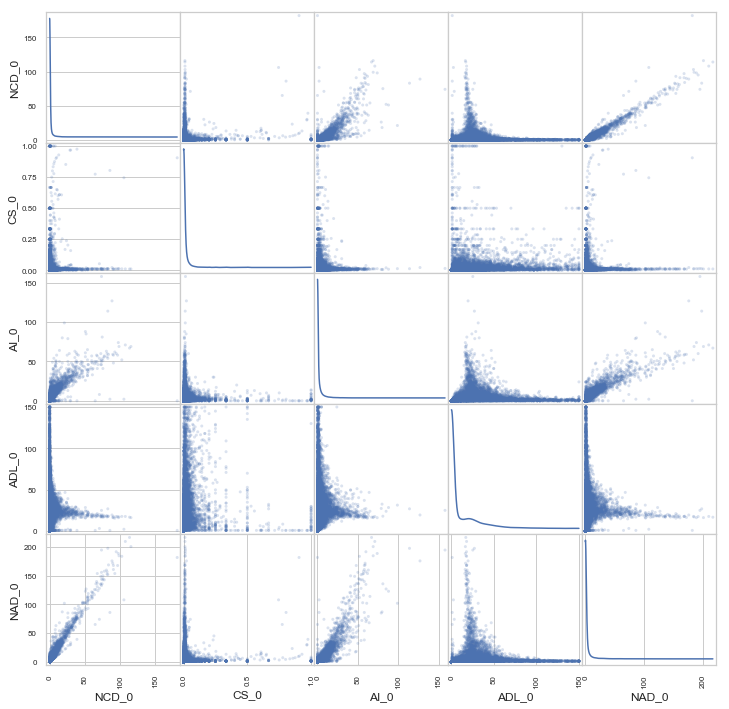

In [58]:
from pandas.plotting import scatter_matrix

data_plot = df_thr[['NCD_0','CS_0','AI_0','ADL_0','NAD_0']]

scatter_matrix(data_plot, alpha=0.2,
               figsize=(12, 12), diagonal='kde');

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


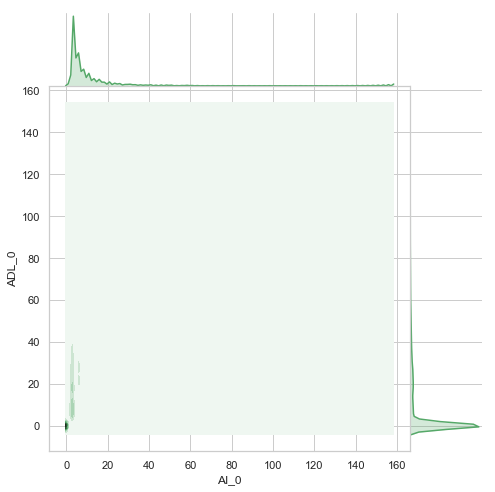

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sns.set()
sns.set_style("whitegrid")
sns.jointplot(x='AI_0',y='ADL_0',data = df_thr[['AI_0','ADL_0']],
              kind="kde", height=7, space=0, color="g")

The plot below show the bivariate distribution of the average length of a discussion belonging to the instance's topic and the number of new authors interacting on the instance's topic at time t. Both are very centered variables with low variances. On the other hand, we can see below the confirmation of that assumption. For clarity purpose, we first minmax-scaled these variables and we can see that they have the same normal-kind distribution centered with low variances.

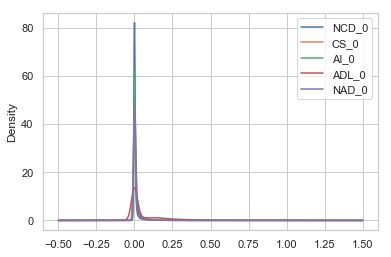

In [60]:
X = pd.DataFrame(MinMaxScaler().fit_transform(data_plot),
                          columns=['NCD_0','CS_0','AI_0','ADL_0','NAD_0'])
X.plot.kde()

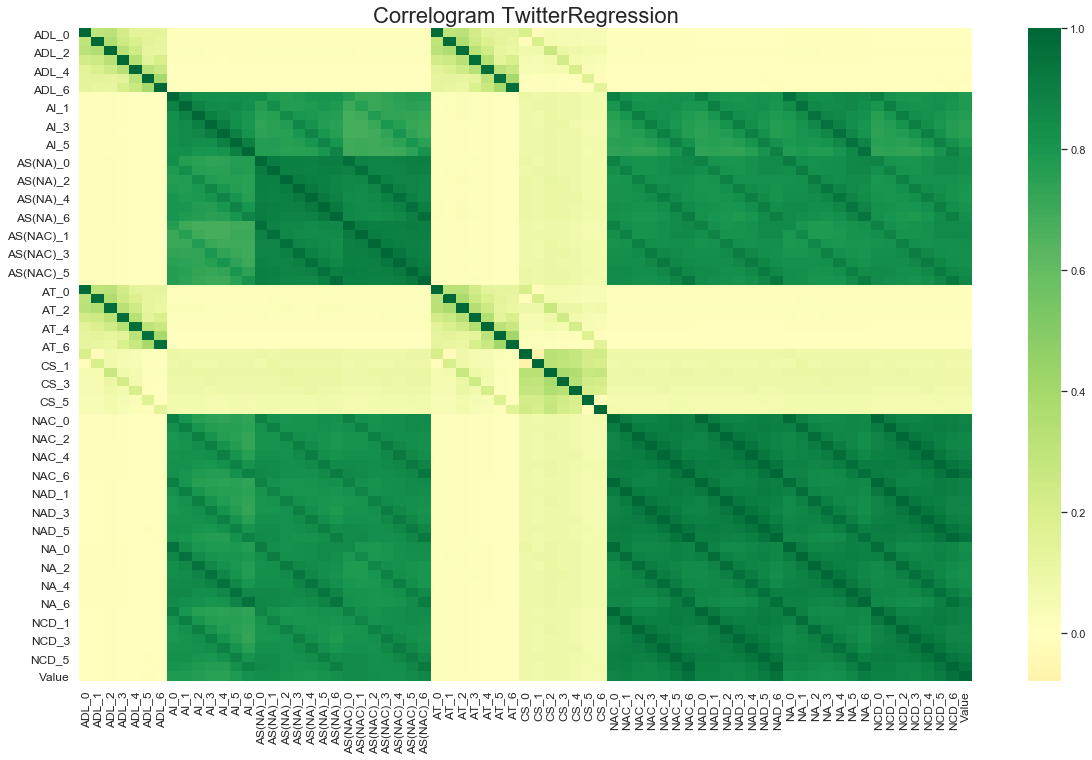

In [61]:
# Plot the correlogram
plt.figure(figsize=(20,12))
sns.heatmap(df_twr.corr(), cmap='RdYlGn', center=0, annot=False)
plt.title('Correlogram TwitterRegression', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

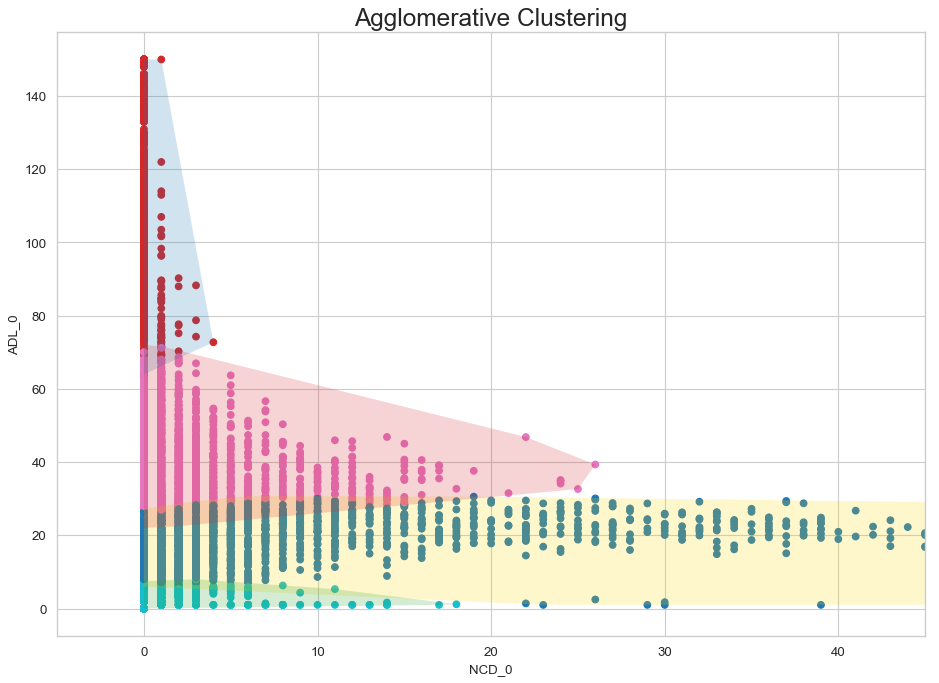

In [62]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_thr[['NCD_0','CS_0','ADL_0','AT_0']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df_thr[['NCD_0', 'ADL_0']].iloc[:,0], df_thr[['NCD_0', 'ADL_0']].iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df_thr.loc[cluster.labels_ == 0, 'NCD_0'], df_thr.loc[cluster.labels_ == 0, 'ADL_0'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df_thr.loc[cluster.labels_ == 1, 'NCD_0'], df_thr.loc[cluster.labels_ == 1, 'ADL_0'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df_thr.loc[cluster.labels_ == 2, 'NCD_0'], df_thr.loc[cluster.labels_ == 2, 'ADL_0'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df_thr.loc[cluster.labels_ == 3, 'NCD_0'], df_thr.loc[cluster.labels_ == 3, 'ADL_0'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('NCD_0'); plt.xticks(fontsize=12)
plt.xlim(-5, 45)
plt.ylabel('ADL_0'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering', fontsize=22)
plt.show()

### Testing Data

In [63]:
from problem import get_test_data

X_test, labels_test = get_test_data()

In [64]:
print("Nombre de thèmes sur Twitter :")
print(len(X_test[X_test['site'] == 'Twitter']))
print("Nombre de thème sur la site TomsHardware :")
print(len(X_test[X_test['site'] == 'Tomshardware']))
print("Proportion en % : ", len(X_test[X_test['site'] == 'Tomshardware']) / (len(X_test[X_test['site'] == 'Tomshardware']) + len(X_test[X_test['site'] == 'Twitter'])))

Nombre de thèmes sur Twitter :
87530
Nombre de thème sur la site TomsHardware :
4185
Proportion en % :  0.0456304857438805


# 2. Pipeline

### Workflow

<img src="./img/workflow.png" width="100%">

## 2.1 Feature Engineering <a name="FeatureEng"></a>

In [65]:
from problem import get_train_data, get_test_data

X_train, labels_train = get_train_data()
X_test, labels_test = get_test_data()

### Output Model

The submission consists of two files: `feature_extractor.py` which defines a `FeatureExtractor` class, and `regressor.py` which defines a `Regressor` class

- `FeatureExtractor` can (optionally) hold code to calculate and add additional features.
- `Regressor` fits the model and predicts on (new) data, as outputted by the `FeatureExtractor`. The prediction should be in the form of a (n_samples, 1) array with the outputed value corresping to level of interest of the theme.

---

Here we give you an example of `FeatureExtractor`, adding an additional feature based on the ratio of two other feature and also the growth of a feature during time: 

In [66]:
# %load submissions/starting_kit/feature_extractor.py

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_new = X_df.copy()
        #X_df_new = compute_derivative(X_df_new, 'NCD', 0, 2)
        #X_df_new = compute_ratio(X_df_new, 'NCD', 'NAD', [0,1,2])
        return X_df_new.drop(columns = 'site')


def compute_derivative(data, feature, int1, int2):
    """
    For a given dataframe, compute the normalized difference over the
    defined period of time time (int1, int2) of a feature (feature) 

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the difference
    int1 : int
        1rst column to take
    int2 : int
        last column to take
    
    Return
    ----------
    The same data frame with int2 - int1 - 1 colums more

    """
    features = [str(feature) + '_' + str(i) for i in range(int1, int2 + 1)]
    for i in range(len(features) - 1):
        data[str(feature) + '_Diff_' + str(i)] = data[features[i+1]] - data[features[i]]
    return data

def compute_ratio(data, feature1, feature2, ints):
    """
        For a given dataframe, compute the normalized difference over the
    defined period of time time (int1, int2) of a feature (feature) 

    Parameters
    ----------
    data : dataframe
    feature1 : str
        feature in the dataframe which will be in the numerator
    feature2 : str
        feature in the dataframe which will be in the denominator
    ints : list of int
        for which number you want to compute the ratio
    
    Return
    ----------
    The dataframe with len(ints) more columns    
    
    """
    new_feature = str(feature1) + "/" + str(feature2)
    for i in ints:
        temp = data[feature2 + '_' + str(i)] + 1 #to avoid 0
        data[new_feature + '_' + str(i)] = data[feature1 + '_' + str(i)] / temp
    
    return data


use %%file submissions/starting_kit/feature_extractor.py overwrite in the file

## 2.2 Regressor <a name="regressor"></a>

And an example `Regressor` doing a standard scaling and Logistic regression for the classification:


In [67]:
# %load submissions/starting_kit/regressor.py

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


class Regressor(BaseEstimator):
    def __init__(self):
        self.model = make_pipeline(StandardScaler(), LinearRegression())

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

use %%file submissions/starting_kit/regressor.py overwrite in the file

You need to name your files `features_extractor.py` and `regressor.py` in order for the ramp workflow to work

# Score Measure

## 3.1 Score Metrics <a name="Score"></a>

In [68]:
from sklearn.metrics import mean_absolute_error, r2_score

#### 3.1.1 R2 Score

In [69]:
def R2_Score(y_true, y_pred):
    return r2_score(y_true, y_pred)

R2_Score shows how well fit a curve or a line. It range from -infinity to 1, where 1 is the best score. 

#### 3.1.2 Mean Absolute Error

In [70]:
def MS_abs_error(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)/len(y_true)

It does the absolute difference between the true value and its prediction, note that this loss is robust to outliers

In [71]:
y1 = np.array([2,5,6,7,8,9])

In [72]:
grid = [i/50 for i in range(1,50)]
R2score = []
for i in grid:
    R2score.append(MS_abs_error(y1, y1 + np.random.normal(0,i, size = len(y1))))

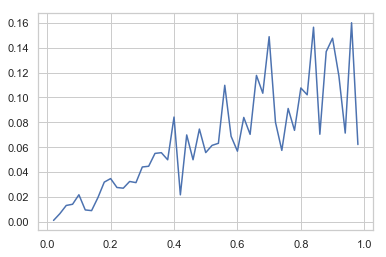

In [73]:
plt.plot(grid, R2score)
plt.show()

By adding a small noise, we see that the MS_abs_error will vary as it goes up, this show how well our prediction is accurate.

#### 3.1.3 Square Error with 5 precision

In [74]:
def RMSE(y_true, y_pred):
    result = np.square(y_true - y_pred)
    less_precision = np.array(list(map(lambda x: x if x>0 else 0, result - 5**2))) 
    return np.sqrt(np.mean(less_precision))/len(y_true)

It does the square difference between the true value and its prediction, we are taking into account the loss only when the difference is greater than 5. We want to be close to the prediction but don't want to be that precise.

In [75]:
y1 = np.array([2,5,6,7,8,9])

In [76]:
grid = [i/10 for i in range(1,100)]
R2score = []
for i in grid:
    R2score.append(RMSE(y1, y1 + np.random.normal(0,i, size = len(y1))))

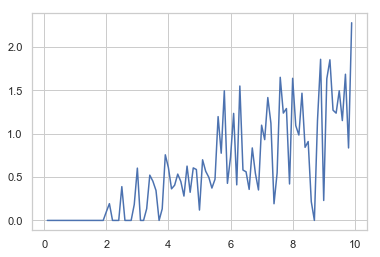

In [77]:
plt.plot(grid, R2score)
plt.show()

By adding a small noise, we see that the RMSE-5pres will vary as it goes up, this show how well our prediction is accurate.

In [78]:
def Scoring(y_true, y_pred, verbose = 0):
        var = R2_Score(y_true, y_pred)
        MSE = MS_abs_error(y_true, y_pred)
        RMSE5 = RMSE(y_true, y_pred)
        print("---------------")
        print('MSE : ', MSE)
        print("---------------")
        print('R2 score : ', var)         
        print("---------------")
        print('RMSE : ', RMSE5)
        if verbose: 
            return var, MSE, RMSE5
        else:
            pass

## 3.2 Ramp_test_submission <a name="ramp"></a>

In [79]:
!ramp_test_submission --submission starting_kit --quick-test

Testing Predicting Buzz of a theme
Reading train and test files from ./data ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score  RMSE_5pres  MSLE    R2
	train        0.09  0.03  0.93
	valid        0.67  0.16  0.57
	test         0.17  0.03  0.70
CV fold 1
	score  RMSE_5pres  MSLE    R2
	train        0.08  0.03  0.94
	valid        0.73  0.18  0.77
	test         0.18  0.03  0.68
CV fold 2
	score  RMSE_5pres  MSLE    R2
	train        0.08  0.03  0.93
	valid        0.89  0.16  0.74
	test         0.17  0.03  0.72
CV fold 3
	score  RMSE_5pres  MSLE    R2
	train        0.08  0.03  0.93
	valid        1.01  0.18  0.58
	test         0.19  0.03  0.62
CV fold 4
	score  RMSE_5pres  MSLE    R2
	train        0.10  0.03  0.92
	valid        0.60  0.15  0.83
	test         0.19  0.03  0.65
----------------------------
Mean CV scores
----------------------------
	score    RMSE_5pres          MSLE            R2
	train  0.09 ± 0.006  0.03 ± 0.001  0.93 ± 0.008
	valid   0.78 ± 0.15  0.17

In [85]:
!ramp_test_submission --submission random-forest-regressor --quick-test

Testing Predicting Buzz of a theme
Reading train and test files from ./data ...
Reading cv ...
Training submissions\random-forest-regressor ...
CV fold 0
	score  RMSE_5pres  MSLE    R2
	train        0.05  0.01  0.98
	valid        0.59  0.11  0.67
	test         0.16  0.02  0.75
CV fold 1
	score  RMSE_5pres  MSLE    R2
	train        0.06  0.01  0.96
	valid        0.72  0.12  0.78
	test         0.17  0.02  0.72
CV fold 2
	score  RMSE_5pres  MSLE    R2
	train        0.06  0.01  0.96
	valid        0.75  0.12  0.81
	test         0.16  0.02  0.73
CV fold 3
	score  RMSE_5pres  MSLE    R2
	train        0.06  0.01  0.96
	valid        0.95  0.14  0.63
	test         0.17  0.02  0.71
CV fold 4
	score  RMSE_5pres  MSLE    R2
	train        0.06  0.01  0.97
	valid        0.43  0.10  0.91
	test         0.15  0.02  0.76
----------------------------
Mean CV scores
----------------------------
	score    RMSE_5pres          MSLE            R2
	train  0.06 ± 0.004    0.01 ± 0.0  0.97 ± 0.006
	valid  0.69 ± 

c:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 

In [80]:
!ramp_test_submission --submission lgbm --quick-test

Testing Predicting Buzz of a theme
Reading train and test files from ./data ...
Reading cv ...
Training submissions\lgbm ...
CV fold 0
	score  RMSE_5pres  MSLE    R2
	train        0.11  0.01  0.91
	valid        0.88  0.16  0.26
	test         0.20  0.03  0.60
CV fold 1
	score  RMSE_5pres  MSLE    R2
	train        0.12  0.02  0.86
	valid        0.88  0.14  0.66
	test         0.21  0.03  0.56
CV fold 2
	score  RMSE_5pres  MSLE    R2
	train        0.10  0.01  0.89
	valid        1.08  0.14  0.61
	test         0.22  0.03  0.51
CV fold 3
	score  RMSE_5pres  MSLE    R2
	train        0.11  0.01  0.88
	valid        1.03  0.15  0.56
	test         0.21  0.03  0.54
CV fold 4
	score  RMSE_5pres  MSLE    R2
	train        0.12  0.01  0.88
	valid        0.77  0.13  0.72
	test         0.21  0.03  0.55
----------------------------
Mean CV scores
----------------------------
	score    RMSE_5pres          MSLE            R2
	train  0.11 ± 0.007    0.01 ± 0.0  0.88 ± 0.017
	valid  0.93 ± 0.114   0.14 ± 0.01

### Interact with the notebook

In [81]:
from sklearn.pipeline import make_pipeline

In [82]:
model = make_pipeline(FeatureExtractor(), Regressor())

In [83]:
model.fit(X_train[:1000], labels_train[:1000])

Pipeline(memory=None,
     steps=[('featureextractor', FeatureExtractor()), ('regressor', Regressor())])

In [84]:
Scoring(model.predict(X_test[:100])[:5], labels_test[:5])

---------------
MSE :  9.162560412080634
---------------
R2 score :  0.9033976624990233
---------------
RMSE :  15.481040020491013
